![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://mona.software/wp-content/uploads/2021/07/data-analyst-la-gi.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Statistics reaction

 ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Install library


In [2]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
post_df_full = pd.read_excel("C:/FinalProject/DoraemonVietNam.xlsx")
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        130 non-null    int64         
 1   text                           128 non-null    object        
 2   post_text                      128 non-null    object        
 3   shared_text                    0 non-null      float64       
 4   original_text                  0 non-null      float64       
 5   time                           130 non-null    datetime64[ns]
 6   timestamp                      130 non-null    int64         
 7   image                          125 non-null    object        
 8   image_lowquality               130 non-null    object        
 9   images                         129 non-null    object        
 10  images_description             129 non-null    object        
 11  images_lowquality  

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Data preprocessing


### Remove unnecessary data

In [3]:
for col in post_df_full.columns :
    miss_data = post_df_full[col].isna().sum()
    miss_per = miss_data / len(post_df_full)
    miss_per = round(miss_per * 100,2)
    print(f"{col} c√≥ : {miss_per}% d·ªØ li·ªáu b·ªã m·∫•t")

post_id c√≥ : 0.0% d·ªØ li·ªáu b·ªã m·∫•t
text c√≥ : 1.54% d·ªØ li·ªáu b·ªã m·∫•t
post_text c√≥ : 1.54% d·ªØ li·ªáu b·ªã m·∫•t
shared_text c√≥ : 100.0% d·ªØ li·ªáu b·ªã m·∫•t
original_text c√≥ : 100.0% d·ªØ li·ªáu b·ªã m·∫•t
time c√≥ : 0.0% d·ªØ li·ªáu b·ªã m·∫•t
timestamp c√≥ : 0.0% d·ªØ li·ªáu b·ªã m·∫•t
image c√≥ : 3.85% d·ªØ li·ªáu b·ªã m·∫•t
image_lowquality c√≥ : 0.0% d·ªØ li·ªáu b·ªã m·∫•t
images c√≥ : 0.77% d·ªØ li·ªáu b·ªã m·∫•t
images_description c√≥ : 0.77% d·ªØ li·ªáu b·ªã m·∫•t
images_lowquality c√≥ : 0.0% d·ªØ li·ªáu b·ªã m·∫•t
images_lowquality_description c√≥ : 0.0% d·ªØ li·ªáu b·ªã m·∫•t
video c√≥ : 98.46% d·ªØ li·ªáu b·ªã m·∫•t
video_duration_seconds c√≥ : 100.0% d·ªØ li·ªáu b·ªã m·∫•t
video_height c√≥ : 100.0% d·ªØ li·ªáu b·ªã m·∫•t
video_id c√≥ : 98.46% d·ªØ li·ªáu b·ªã m·∫•t
video_quality c√≥ : 100.0% d·ªØ li·ªáu b·ªã m·∫•t
video_size_MB c√≥ : 100.0% d·ªØ li·ªáu b·ªã m·∫•t
video_thumbnail c√≥ : 98.46% d·ªØ li·ªáu b·ªã m·∫•t
video_watches c√≥ : 100.0% d·ªØ li·ªáu b·

<Axes: >

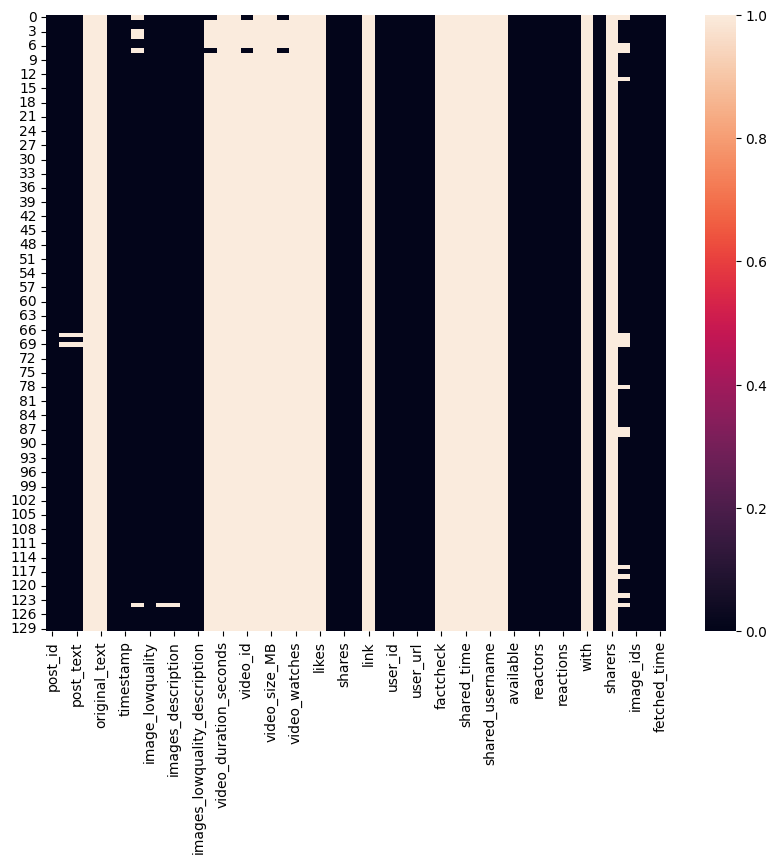

In [4]:
fig , ax = plt.subplots(figsize = (10,8))
sns.heatmap(post_df_full.isna())

In [5]:
for col in post_df_full.columns:
    miss_data = post_df_full[col].isna().sum()
    miss_per = miss_data / len(post_df_full)
    miss_per = round(miss_per * 100, 2)
    
    if miss_per > 90:
        post_df_full.drop(col, axis=1, inplace=True)
        print(f"{col} ƒë√£ b·ªã x√≥a v√¨ c√≥ {miss_per}% d·ªØ li·ªáu b·ªã m·∫•t.")


shared_text ƒë√£ b·ªã x√≥a v√¨ c√≥ 100.0% d·ªØ li·ªáu b·ªã m·∫•t.
original_text ƒë√£ b·ªã x√≥a v√¨ c√≥ 100.0% d·ªØ li·ªáu b·ªã m·∫•t.
video ƒë√£ b·ªã x√≥a v√¨ c√≥ 98.46% d·ªØ li·ªáu b·ªã m·∫•t.
video_duration_seconds ƒë√£ b·ªã x√≥a v√¨ c√≥ 100.0% d·ªØ li·ªáu b·ªã m·∫•t.
video_height ƒë√£ b·ªã x√≥a v√¨ c√≥ 100.0% d·ªØ li·ªáu b·ªã m·∫•t.
video_id ƒë√£ b·ªã x√≥a v√¨ c√≥ 98.46% d·ªØ li·ªáu b·ªã m·∫•t.
video_quality ƒë√£ b·ªã x√≥a v√¨ c√≥ 100.0% d·ªØ li·ªáu b·ªã m·∫•t.
video_size_MB ƒë√£ b·ªã x√≥a v√¨ c√≥ 100.0% d·ªØ li·ªáu b·ªã m·∫•t.
video_thumbnail ƒë√£ b·ªã x√≥a v√¨ c√≥ 98.46% d·ªØ li·ªáu b·ªã m·∫•t.
video_watches ƒë√£ b·ªã x√≥a v√¨ c√≥ 100.0% d·ªØ li·ªáu b·ªã m·∫•t.
video_width ƒë√£ b·ªã x√≥a v√¨ c√≥ 100.0% d·ªØ li·ªáu b·ªã m·∫•t.
likes ƒë√£ b·ªã x√≥a v√¨ c√≥ 100.0% d·ªØ li·ªáu b·ªã m·∫•t.
link ƒë√£ b·ªã x√≥a v√¨ c√≥ 100.0% d·ªØ li·ªáu b·ªã m·∫•t.
factcheck ƒë√£ b·ªã x√≥a v√¨ c√≥ 100.0% d·ªØ li·ªáu b·ªã m·∫•t.
shared_post_id ƒë√£ b·ªã x√≥a v√¨ c√≥ 100.0% d·ªØ li·ªáu b·ªã m·∫•t.
shared_

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Statistics and Visualization


In [17]:
post_df_full

post_id                                               text  \
0     733451988821373  Phim ho·∫°t h√¨nh ƒê√¥ r√™ mon t·ª´ng ƒë∆∞·ª£c l·ªìng ti·∫øng ...   
1     733109305522308  |B·ªò BOARD GAME DORAEMON ƒê·∫¶U TI√äN S·∫ÆP XU·∫§T HI·ªÜN...   
2     732388768927695  Ch∆∞a l√†m ƒë∆∞·ª£c t√≠ch s·ª± g√¨ nh∆∞ng v·ª´a ƒë·∫øn ƒë√£ ƒÉn l...   
3     731920548974517                          M·ªôt ph√∫t th·∫≠t l√≤ng n√†o :)   
4     731844392315466  Movie Doraemon m·ªõi: Nobita v√† cu·ªôc phi√™u l∆∞u ƒë...   
..                ...                                                ...   
125  2455989184531512           L·∫°i t·ªôi nghi·ªáp qu√° c∆°\nCre: Chuy·ªán nh√† S   
126  2452635751533522                                            Xinhhhh   
127  2448957895234641  Nghe n√≥i l√† ch∆°i th√¢n v·ªõi nhau s·∫Ω tr·ªü n√™n gi·ªën...   
128  2439249156205515  ·ªû nh√† ngh·ªâ d·ªãch c·ª© nh∆∞ th·∫ø n√†y\nB·∫£o sao tr·ªçng ...   
129  2437721029691661  H√¨nh ·∫£nh t√¥i ch√©p h·∫øt b√†i online trong t∆∞∆°ng l...   

                                             post_text                time  \
0    Phim ho·∫°t h√¨nh ƒê√¥ r√™ mon t·ª´ng ƒë∆∞·ª£c l·ªìng ti·∫øng ... 2023-11-11 08:50:06   
1    |B·ªò BOARD GAME DORAEMON ƒê·∫¶U TI√äN S·∫ÆP XU·∫§T HI·ªÜN... 2023-11-10 20:01:56   
2    Ch∆∞a l√†m ƒë∆∞·ª£c t√≠ch s·ª± g√¨ nh∆∞ng v·ª´a ƒë·∫øn ƒë√£ ƒÉn l... 2023-11-09 10:46:39   
3                            M·ªôt ph√∫t th·∫≠t l√≤ng n√†o :) 2023-11-08 18:46:30   
4    Movie Doraemon m·ªõi: Nobita v√† cu·ªôc phi√™u l∆∞u ƒë... 2023-11-08 15:05:21   
..                                                 ...                 ...   
125           L·∫°i t·ªôi nghi·ªáp qu√° c∆°\nCre: Chuy·ªán nh√† S 2021-11-06 21:04:14   
126                                            Xinhhhh 2021-11-02 20:47:51   
127  Nghe n√≥i l√† ch∆°i th√¢n v·ªõi nhau s·∫Ω tr·ªü n√™n gi·ªën... 2021-10-29 10:57:41   
128  ·ªû nh√† ngh·ªâ d·ªãch c·ª© nh∆∞ th·∫ø n√†y\nB·∫£o sao tr·ªçng ... 2021-10-17 17:10:41   
129  H√¨nh ·∫£nh t√¥i ch√©p h·∫øt b√†i online trong t∆∞∆°ng l... 2021-10-15 19:57:12   

      timestamp                                              image  \
0    1699667406                                                NaN   
1    1699621316  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
2    1699501599  https://m.facebook.com/photo/view_full_size/?f...   
3    1699443990                                                NaN   
4    1699430721                                                NaN   
..          ...                                                ...   
125  1636207454  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
126  1635860871  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
127  1635479861  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
128  1634465441  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
129  1634302632  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   

                                      image_lowquality  \
0    https://scontent.fhan2-4.fna.fbcdn.net/v/t15.5...   
1    https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
2    https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
3    https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
4    https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
..                                                 ...   
125  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
126  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
127  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
128  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
129  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   

                                                images  \
0                                                   []   
1    ['https://scontent.fhan2-4.fna.fbcdn.net/v/t39...   
2    ['https://m.facebook.com/photo/view_full_size/...   
3                                                   []   
4                                                   []   
..                                                 .

In [18]:
post_df_full["comments_full"]

0      [{'comment_id': '849551596902680', 'comment_ur...
1      [{'comment_id': '867705468222647', 'comment_ur...
2      [{'comment_id': '315620721225362', 'comment_ur...
3      [{'comment_id': '1011347420111090', 'comment_u...
4      [{'comment_id': '1165768371050560', 'comment_u...
                             ...                        
125    [{'comment_id': '2455999847863779', 'comment_u...
126    [{'comment_id': '2452668528196911', 'comment_u...
127    [{'comment_id': '2048804838633207', 'comment_u...
128    [{'comment_id': '2439411446189286', 'comment_u...
129    [{'comment_id': '2437741633022934', 'comment_u...
Name: comments_full, Length: 130, dtype: object

### Mean number of interactions

In [19]:
post_df_full.groupby(post_df_full["time"].dt.year)[['reaction_count','shares','comments']].sum()

reaction_count  shares  comments
time                                  
2021          109940    1580      2678
2022          509581    6168     21009
2023          258563    4954     10414

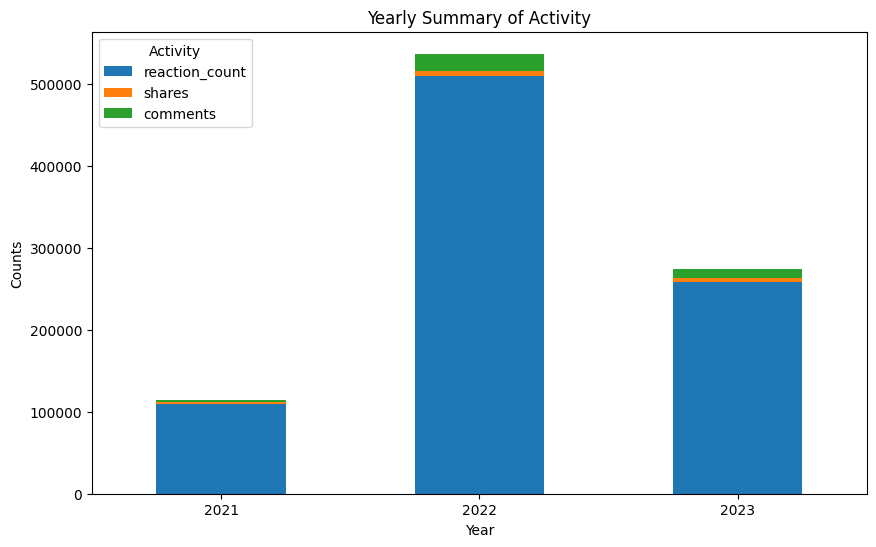

In [20]:
yearly_summary = post_df_full.groupby(post_df_full["time"].dt.year)[['reaction_count', 'shares', 'comments']].sum()

# Plot the data as a stacked bar chart
yearly_summary.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Yearly Summary of Activity')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Add a legend
plt.legend(title='Activity', loc='upper left')

plt.show()

In [21]:
start_date = post_df_full["time"].min().strftime('%Y-%m-%d')
end_date = post_df_full["time"].max().strftime('%Y-%m-%d')

print(f"M·ªëc th·ªùi gian thu th·∫≠p t·ª´ {start_date} ƒë·∫øn {end_date}")

M·ªëc th·ªùi gian thu th·∫≠p t·ª´ 2021-10-15 ƒë·∫øn 2023-11-11


In [22]:
print("T·ªïng reaction :",post_df_full["reaction_count"].sum())


T·ªïng reaction : 878084


In [23]:
average_reaction = round(post_df_full["reaction_count"].mean(), 2)
print("S·ªë reaction trung b√¨nh:", average_reaction)

S·ªë reaction trung b√¨nh: 6754.49


In [16]:
print("T·ªïng shares :",post_df_full["shares"].sum())

T·ªïng shares : 12702


In [15]:
average_shares = round(post_df_full["shares"].mean(), 2)
print("S·ªë shares trung b√¨nh m·ªói b√†i post:", average_shares)

S·ªë shares trung b√¨nh m·ªói b√†i post: 97.71


In [17]:
print("T·ªïng s·ªë Comments :",post_df_full["comments"].sum())

T·ªïng s·ªë Comments : 34101


In [18]:
average_cmt = round(post_df_full["comments"].mean(), 2)
print("S·ªë comments trung b√¨nh m·ªói b√†i post:", average_cmt)

S·ªë comments trung b√¨nh m·ªói b√†i post: 262.32


### Daily reactions

In [9]:

post_df_full1=post_df_full
post_df_full1[['post_id','time', 'reactions','reaction_count']]

post_id                time  \
0     733451988821373 2023-11-11 08:50:06   
1     733109305522308 2023-11-10 20:01:56   
2     732388768927695 2023-11-09 10:46:39   
3     731920548974517 2023-11-08 18:46:30   
4     731844392315466 2023-11-08 15:05:21   
..                ...                 ...   
125  2455989184531512 2021-11-06 21:04:14   
126  2452635751533522 2021-11-02 20:47:51   
127  2448957895234641 2021-10-29 10:57:41   
128  2439249156205515 2021-10-17 17:10:41   
129  2437721029691661 2021-10-15 19:57:12   

                                             reactions  reaction_count  
0    {'th√≠ch': 10524, 'y√™u th√≠ch': 607, 'haha': 150...           27027  
1             {'th√≠ch': 26, 'y√™u th√≠ch': 12, 'wow': 1}              39  
2    {'th√≠ch': 472, 'y√™u th√≠ch': 7, 'haha': 559, 'w...            1041  
3    {'th√≠ch': 1939, 'y√™u th√≠ch': 1195, 'haha': 188...            3426  
4    {'th√≠ch': 283, 'y√™u th√≠ch': 3, 'haha': 422, 'w...             720  
..                                                 ...             ...  
125  {'th√≠ch': 319, 'y√™u th√≠ch': 6, 'haha': 407, 't...             745  
126  {'th√≠ch': 2460, 'y√™u th√≠ch': 1124, 'haha': 31,...            3685  
127  {'th√≠ch': 1100, 'y√™u th√≠ch': 25, 'haha': 1204,...            2376  
128  {'th√≠ch': 352, 'y√™u th√≠ch': 15, 'haha': 200, '...             578  
129  {'th√≠ch': 860, 'y√™u th√≠ch': 11, 'haha': 549, '...            1600  

[130 rows x 4 columns]

In [29]:
post_df_full['time'] = pd.to_datetime(post_df_full['time'])

In [30]:
y_rea = post_df_full.groupby(post_df_full["time"].dt.year)['reaction_count'].sum()
y_rea

time
2021    109940
2022    509581
2023    258563
Name: reaction_count, dtype: int64

In [32]:
sizes = y_rea.values 
labels = y_rea.index

Text(0, 0.5, 'Reaction_count')

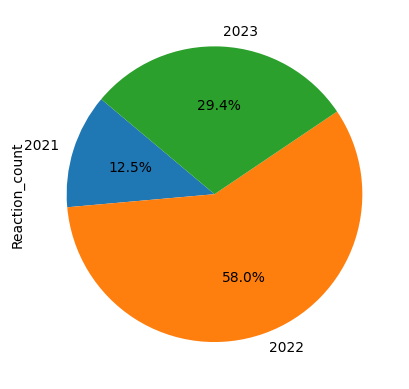

In [33]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.ylabel("Reaction_count")

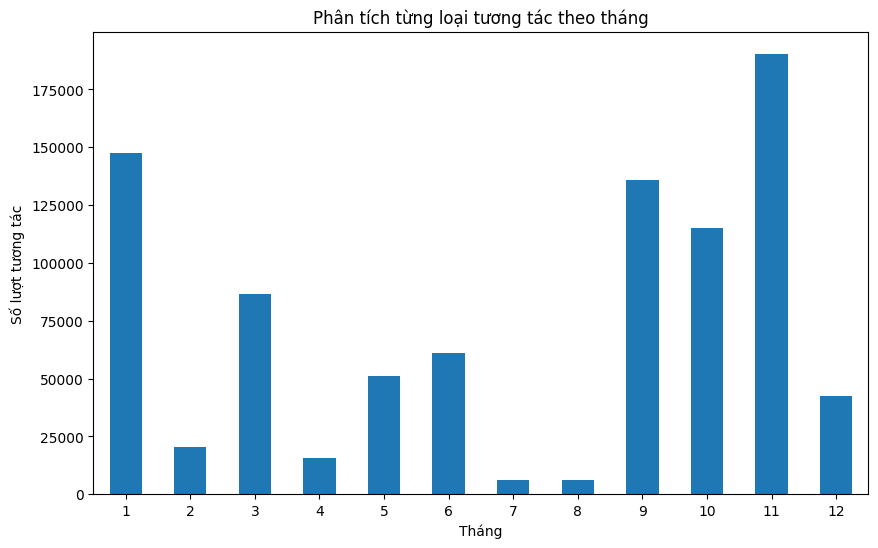

In [44]:
t_sha = post_df_full.groupby(post_df_full["time"].dt.month)['reaction_count'].sum()
t_sha.plot(kind = "bar",figsize = (10,6))
plt.title('Ph√¢n t√≠ch t·ª´ng lo·∫°i t∆∞∆°ng t√°c theo th√°ng')
plt.xlabel('Th√°ng')
plt.ylabel('S·ªë l∆∞·ª£t t∆∞∆°ng t√°c')
plt.xticks(rotation=0)  
plt.show()

### Categorize each emotion


In [10]:
# chuy·ªÉn ki·ªÉu
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )

C:\Users\FPT\AppData\Local\Temp\ipykernel_17788\1935438685.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )


In [12]:
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)

for i in range(0, len(post_df_full_with_reactions['th√≠ch'].values), 1):
    if pd.isna(post_df_full_with_reactions['th√≠ch'].values[i]):
        post_df_full_with_reactions['th√≠ch'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['y√™u th√≠ch'].values[i]):
        post_df_full_with_reactions['y√™u th√≠ch'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['bu·ªìn'].values[i]):
        post_df_full_with_reactions['bu·ªìn'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['ph·∫´n n·ªô'].values[i]):
        post_df_full_with_reactions['ph·∫´n n·ªô'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['th∆∞∆°ng th∆∞∆°ng'].values[i]):
        post_df_full_with_reactions['th∆∞∆°ng th∆∞∆°ng'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['shares'].values[i]):
        post_df_full_with_reactions['shares'].values[i] = 0
    
    if pd.isna(post_df_full_with_reactions['comments'].values[i]):
        post_df_full_with_reactions['comments'].values[i] = 0

post_df_full_with_reactions[['post_text','th√≠ch','y√™u th√≠ch','haha','wow','bu·ªìn','ph·∫´n n·ªô','th∆∞∆°ng th∆∞∆°ng',
                                 'shares','comments','reaction_count']]


post_text    th√≠ch  y√™u th√≠ch  \
0    Phim ho·∫°t h√¨nh ƒê√¥ r√™ mon t·ª´ng ƒë∆∞·ª£c l·ªìng ti·∫øng ...  10524.0      607.0   
1    |B·ªò BOARD GAME DORAEMON ƒê·∫¶U TI√äN S·∫ÆP XU·∫§T HI·ªÜN...     26.0       12.0   
2    Ch∆∞a l√†m ƒë∆∞·ª£c t√≠ch s·ª± g√¨ nh∆∞ng v·ª´a ƒë·∫øn ƒë√£ ƒÉn l...    472.0        7.0   
3                            M·ªôt ph√∫t th·∫≠t l√≤ng n√†o :)   1939.0     1195.0   
4    Movie Doraemon m·ªõi: Nobita v√† cu·ªôc phi√™u l∆∞u ƒë...    283.0        3.0   
..                                                 ...      ...        ...   
125           L·∫°i t·ªôi nghi·ªáp qu√° c∆°\nCre: Chuy·ªán nh√† S    319.0        6.0   
126                                            Xinhhhh   2460.0     1124.0   
127  Nghe n√≥i l√† ch∆°i th√¢n v·ªõi nhau s·∫Ω tr·ªü n√™n gi·ªën...   1100.0       25.0   
128  ·ªû nh√† ngh·ªâ d·ªãch c·ª© nh∆∞ th·∫ø n√†y\nB·∫£o sao tr·ªçng ...    352.0       15.0   
129  H√¨nh ·∫£nh t√¥i ch√©p h·∫øt b√†i online trong t∆∞∆°ng l...    860.0       11.0   

        haha    wow   bu·ªìn  ph·∫´n n·ªô  th∆∞∆°ng th∆∞∆°ng  shares  comments  \
0    15041.0  128.0  642.0      2.0           83.0    2397      3933   
1        0.0    1.0    0.0      0.0            0.0       3         6   
2      559.0    1.0    2.0      0.0            0.0       2         8   
3      188.0    1.0    3.0      0.0          100.0      21       346   
4      422.0    4.0    8.0      0.0            0.0       8        25   
..       ...    ...    ...      ...            ...     ...       ...   
125    407.0    0.0   10.0      0.0            3.0       6        12   
126     31.0   16.0    6.0      1.0           47.0     350       112   
127   1204.0    3.0   35.0      1.0            8.0      27       122   
128    200.0    1.0    6.0      1.0            3.0       8        10   
129    549.0    2.0  175.0      0.0            3.0      43        57   

     reaction_count  
0             27027  
1                39  
2              1041  
3              3426  
4               720  
..              ...  
125             745  
126            3685  
127            2376  
128             578  
129            1600  

[130 rows x 11 columns]

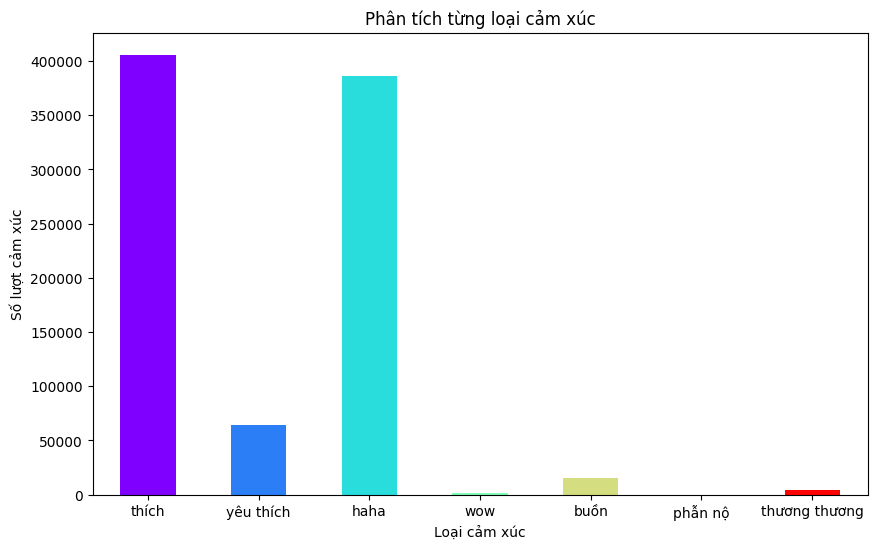

In [13]:
emotions_data = post_df_full_with_reactions[['th√≠ch', 'y√™u th√≠ch', 'haha', 'wow', 'bu·ªìn', 'ph·∫´n n·ªô', 'th∆∞∆°ng th∆∞∆°ng']]
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, len(emotions_data.columns)))

emotions_data.sum().plot(kind='bar', figsize=(10, 6),color=rainbow_colors)
plt.title('Ph√¢n t√≠ch t·ª´ng lo·∫°i c·∫£m x√∫c')
plt.xlabel('Lo·∫°i c·∫£m x√∫c')
plt.ylabel('S·ªë l∆∞·ª£t c·∫£m x√∫c')
plt.xticks(rotation=0)  
plt.show()

In [38]:
x  = round(post_df_full_with_reactions["haha"].sum() / post_df_full["reaction_count"].sum(),4) * 100
print("S·ªë l∆∞·ª£t t∆∞∆°ng t√°c Haha chi·∫øm : " + str(x) + "%, ch·ª©ng t·ªè n·ªôi dung b√†i vi·∫øt th∆∞·ªùng mang ch·ªß ƒë·ªÅ vui v·∫ª!")

S·ªë l∆∞·ª£t t∆∞∆°ng t√°c Haha chi·∫øm : 43.96%, ch·ª©ng t·ªè n·ªôi dung b√†i vi·∫øt th∆∞·ªùng mang ch·ªß ƒë·ªÅ vui v·∫ª!


C:\Users\FPT\AppData\Local\Temp\ipykernel_17788\4260507355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotions_data['time'] = pd.to_datetime(emotions_data['time'])
C:\Users\FPT\AppData\Local\Temp\ipykernel_17788\4260507355.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotions_data.fillna(0, inplace=True)  # Replace NaN with 0, assuming missing values mean no reactions


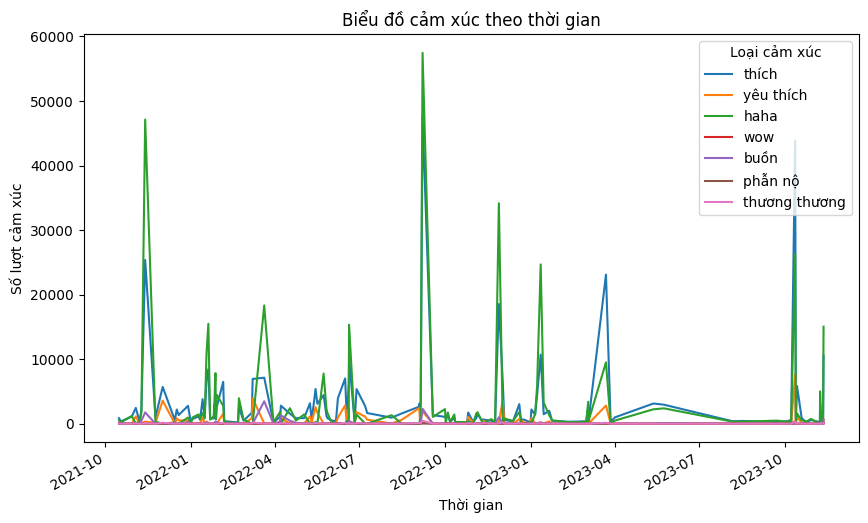

In [14]:
emotions_data = post_df_full_with_reactions[['time', 'th√≠ch', 'y√™u th√≠ch', 'haha', 'wow', 'bu·ªìn', 'ph·∫´n n·ªô', 'th∆∞∆°ng th∆∞∆°ng']]

emotions_data['time'] = pd.to_datetime(emotions_data['time'])

emotions_data.set_index('time', inplace=True)

emotions_data.fillna(0, inplace=True)  # Replace NaN with 0

emotions_data.plot(figsize=(10, 6))
plt.title('Bi·ªÉu ƒë·ªì c·∫£m x√∫c theo th·ªùi gian')
plt.xlabel('Th·ªùi gian')
plt.ylabel('S·ªë l∆∞·ª£t c·∫£m x√∫c')
plt.legend(title='Lo·∫°i c·∫£m x√∫c')

plt.show()

#### Correlate posts over time

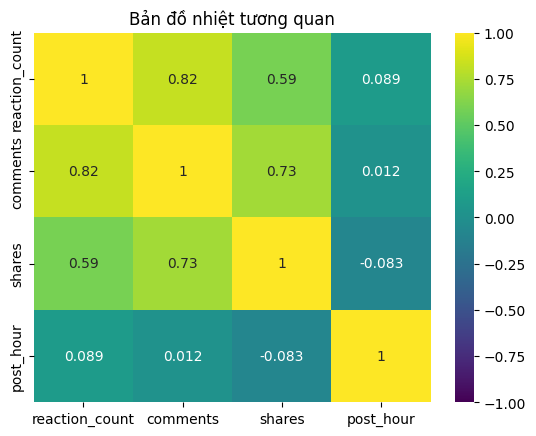

In [61]:
corr = post_df_full[['reaction_count', 'comments', 'shares', 'post_hour']].corr()

sns.heatmap(corr, annot=True, cmap='viridis', vmin=-1, vmax=1)

plt.title('B·∫£n ƒë·ªì nhi·ªát t∆∞∆°ng quan')
plt.show()

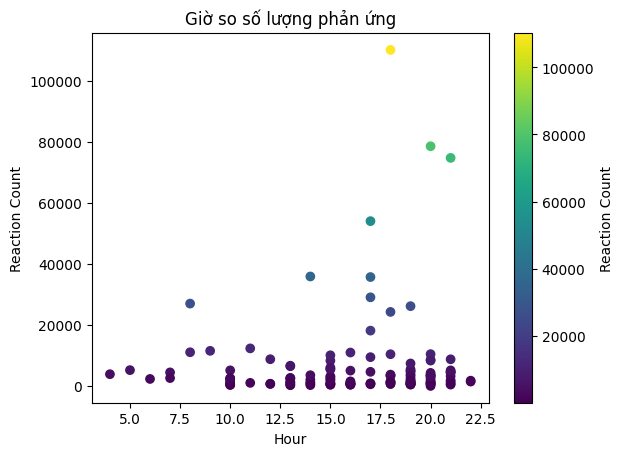

In [62]:
plt.scatter(post_df_full['post_hour'], post_df_full['reaction_count'], c=post_df_full['reaction_count'], cmap='viridis')
plt.title('Gi·ªù so s·ªë l∆∞·ª£ng ph·∫£n ·ª©ng')
plt.xlabel('Hour')
plt.ylabel('Reaction Count')
plt.colorbar(label='Reaction Count') 

plt.show()

### Posts with the max,min interactions

In [19]:
print("S·ªë l∆∞·ª£t t∆∞∆°ng t√°c nhi·ªÅu nh·∫•t :",post_df_full["reaction_count"].max())

S·ªë l∆∞·ª£t t∆∞∆°ng t√°c nhi·ªÅu nh·∫•t : 110184


In [20]:


# Find the row with the maximum reaction_count
max_reaction_row = post_df_full.loc[post_df_full["reaction_count"].idxmax()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_max = max_reaction_row["reactions"]

# Convert the dictionary to a formatted string with line breaks
formatted_reactions = "\n".join([f"{reaction_type}: {count}" for reaction_type, count in reaction_max.items()])

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Reactions: \n{formatted_reactions}")

Post Id: 2708273079303120
Post Text: Gh√©t c·ªßa n√†o tr·ªùi trao c·ªßa ƒë·∫•y
Time: 2022-09-06 18:30:30
Reactions: 
th√≠ch: 47712
y√™u th√≠ch: 1907
haha: 57465
wow: 299
th∆∞∆°ng th∆∞∆°ng: 454
bu·ªìn: 2313
ph·∫´n n·ªô: 34


In [46]:
print("S·ªë l∆∞·ª£t t∆∞∆°ng t√°c √≠t nh·∫•t :",post_df_full["reaction_count"].min())

S·ªë l∆∞·ª£t t∆∞∆°ng t√°c √≠t nh·∫•t : 39


In [47]:

max_reaction_row = post_df_full.loc[post_df_full["reaction_count"].idxmin()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_max = max_reaction_row["reactions"]

formatted_reactions = "\n".join([f"{reaction_type}: {count}" for reaction_type, count in reaction_max.items()])

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Reactions:\n{formatted_reactions}")

Post Id: 733109305522308
Post Text: |B·ªò BOARD GAME DORAEMON ƒê·∫¶U TI√äN S·∫ÆP XU·∫§T HI·ªÜN!!|

M·ªõi nghe n√≥i EverJoy s·∫Øp tr√¨nh l√†ng b·ªô game Doraemon ƒë∆∞·ª£c ch√≠nh ch·ªß b·∫£n quy·ªÅn Fujio b√™n Nh·∫≠t c·∫•p ph√©p, ch·∫Øc ch·∫Øn s·∫Ω t·∫°o ra m·ªôt c∆°n s·ªët l·ªõn.
C√≥ th·ªÉ ch√∫ng ta ƒë√£ t·ª´ng nghe qua ƒë·∫øn c√°i t√™n EverJoy. EverJoy Publishing l√† c√¥ng ty ho·∫°t ƒë·ªông trong lƒ©nh v·ª±c gi·∫£i tr√≠ t∆∞∆°ng t√°c, ƒë·∫ßu t∆∞ v√†o c√°c th∆∞∆°ng hi·ªáu h√†ng ƒë·∫ßu v·ªÅ gi·∫£i tr√≠ nh∆∞ Board Game VN (th∆∞∆°ng hi·ªáu ph√°t h√†nh v√† ph√¢n ph·ªëi board game l·ªõn nh·∫•t Vi·ªát Nam), hay L·ªõp H·ªçc M·∫≠t Ng·ªØ (th∆∞∆°ng hi·ªáu truy·ªán tranh d√†nh cho tu·ªïi teen s·ªë 1 t·∫°i Vi·ªát Nam). C√°c s·∫£n ph·∫©m v√† gi·∫£i ph√°p c·ªßa EverJoy ƒë√£ mang ni·ªÅm vui ƒë·∫øn h√†ng tri·ªáu kh√°ch h√†ng, ƒë√°p ·ª©ng nhu c·∫ßu gi·∫£i tr√≠ t·∫°i gia ƒë√¨nh c≈©ng nh∆∞ t·∫°i c√¥ng s·ªü.
Trong nƒÉm 2023, ngo√†i vi·ªác ph√°t tri·ªÉn c√°c board game truy·ªÅn th·ªëng, th∆∞∆°ng hi·ªáu ph√°t

##### Number of posts with likes greater than 10k

In [45]:
post_df_full[post_df_full["reaction_count"] >= 10000][["post_id", "post_text", "time", "reactions", "reaction_count", "shares", "comments"]]


post_id                                          post_text  \
0     733451988821373  Phim ho·∫°t h√¨nh ƒê√¥ r√™ mon t·ª´ng ƒë∆∞·ª£c l·ªìng ti·∫øng ...   
14    714647757368463                C√≥ h·∫≥n ph√≤ng ri√™ng cho chu·ªôt c∆° :))   
25    595757249257515                C√°ch ƒë·ªÉ l√†m tan ƒëi c√°i n√≥ng l√∫c n√†y   
33   2828329883964105                               S·ª± th·∫≠t m·∫•t l√≤ng :))   
34   2824884297641997                ƒê·ªôc l·∫° Tokyo :))\n\n·∫¢nh: Kh√¥i D∆∞∆°ng   
44   2789942831136144  89 nƒÉm ng√†y sinh c·ªë h·ªça sƒ© Fujiko F. Fujio\n01...   
45   2786271731503254  Nu√¥i ƒÉn mi·ªÖn ph√≠ r·ªìi ƒë·ªÉ n√≥ t√¨m m·∫π trong th√πng ...   
64   2708273079303120                     Gh√©t c·ªßa n√†o tr·ªùi trao c·ªßa ƒë·∫•y   
75   2643960622401033                               ƒê√¢y m·ªõi l√† ch·ªìn n√†yüôÑ   
78   2640432139420548  Happy Birthday Chaien 15/06\n\nM·∫∑c d√π kh√° c·ª•c ...   
84   2620535051410257                                 B·ªõt ƒëua ƒë√≤i ƒëi :))   
95   2567479686715794  Bi·∫øt l√† Chaien l·ªìi r·ªën nh∆∞ng c√≥ ph·∫£i ƒë·∫øn m·ª©c n...   
96   2557455394384890  M√πng 8/3, xin g·ª≠i t√¨nh y√™u v√† l√≤ng bi·∫øt ∆°n s√¢u...   
102  2530807110383052                     Ch·ªìn c≈©ng cute m√† ü•∞\n#doraemon   
105  2524018574395239      Ai c≈©ng c√≥ ∆∞·ªõc m∆° :)))\n#doraemon #doraemonvn   
109  2517517261712037   DƒÉm ba thanh ni√™n Avengers tu·ªïi g√¨ v·ªõi th√°nh :))   
110  2515896618540768          Ch·∫£i chu·ªët g·ªçn g√†ng ƒë·ªÉ c√≤n ƒëi h·∫πn h√≤ ‚ù§Ô∏è‚ù§Ô∏è   
123  2461153630681734                 L√† ma nh∆∞ng xem phim ma v·∫´n s·ª£ :))   

                   time                                          reactions  \
0   2023-11-11 08:50:06  {'th√≠ch': 10524, 'y√™u th√≠ch': 607, 'haha': 150...   
14  2023-10-11 20:59:04  {'th√≠ch': 43874, 'y√™u th√≠ch': 7652, 'haha': 26...   
25  2023-03-22 17:23:32  {'th√≠ch': 23111, 'y√™u th√≠ch': 2814, 'haha': 95...   
33  2023-01-11 14:52:32  {'th√≠ch': 10712, 'y√™u th√≠ch': 205, 'haha': 246...   
34  2023-01-07 18:21:46  {'th√≠ch': 4429, 'y√™u th√≠ch': 35, 'haha': 5860,...   
44  2022-12-01 20:05:23  {'th√≠ch': 6630, 'y√™u th√≠ch': 3577, 'haha': 10,...   
45  2022-11-27 17:04:17  {'th√≠ch': 18542, 'y√™u th√≠ch': 228, 'haha': 341...   
64  2022-09-06 18:30:30  {'th√≠ch': 47712, 'y√™u th√≠ch': 1907, 'haha': 57...   
75  2022-06-19 19:51:33  {'th√≠ch': 10099, 'y√™u th√≠ch': 234, 'haha': 153...   
78  2022-06-15 15:47:58  {'th√≠ch': 7013, 'y√™u th√≠ch': 2852, 'haha': 81,...   
84  2022-05-23 11:50:53  {'th√≠ch': 4449, 'y√™u th√≠ch': 46, 'haha': 7774,...   
95  2022-03-20 17:46:03  {'th√≠ch': 7135, 'y√™u th√≠ch': 46, 'haha': 18334...   
96  2022-03-08 08:22:47  {'th√≠ch': 6942, 'y√™u th√≠ch': 3932, 'haha': 15,...   
102 2022-02-04 16:45:39  {'th√≠ch': 6492, 'y√™u th√≠ch': 1549, 'haha': 277...   
105 2022-01-27 09:05:07  {'th√≠ch': 3293, 'y√™u th√≠ch': 53, 'haha': 7835,...   
109 2022-01-19 18:04:31  {'th√≠ch': 8464, 'y√™u th√≠ch': 150, 'haha': 1548...   
110 2022-01-17 17:48:20  {'th√≠ch': 6744, 'y√™u th√≠ch': 314, 'haha': 1079...   
123 2021-11-12 21:48:30  {'th√≠ch': 25386, 'y√™u th√≠ch': 332, 'haha': 471...   

     reaction_count  shares  comments  
0             27027    2397      3933  
14            78610     916      2014  
25            35731     359       878  
33            35913     351       822  
34            10429      43       122  
44            10460      78        51  
45            54060     331      1510  
64           110184     921      8125  
75            26191     181       958  
78            10083      52       397  
84            12347     141       165  
95            29085     238       939  
96            11080     102        75  
102           10985      94       115  
105           11540     117       132  
109           24299     426       742  
110           18167     222       604  
123           74790     436      1304

### Posts with the max,min shares

In [49]:
y_sha = post_df_full.groupby(post_df_full["time"].dt.year)['shares'].sum()
y_sha

time
2021    1580
2022    6168
2023    4954
Name: shares, dtype: int64

Text(0, 0.5, 'Shares')

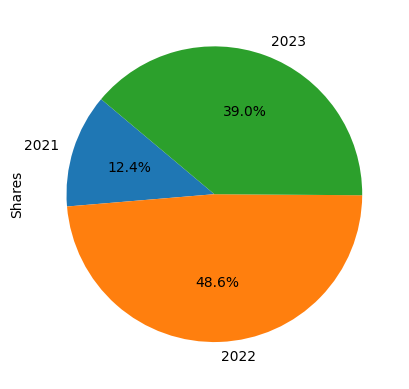

In [50]:
sizes = y_sha.values
labels = y_sha.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.ylabel("Shares")

In [46]:

max_reaction_row = post_df_full.loc[post_df_full["shares"].idxmax()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_shares = max_reaction_row["shares"]

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Shares: {reaction_shares}")

Post Id: 733451988821373
Post Text: Phim ho·∫°t h√¨nh ƒê√¥ r√™ mon t·ª´ng ƒë∆∞·ª£c l·ªìng ti·∫øng B·∫Øc v√† chi·∫øu tr√™n VTV1 üòÖ
Time: 2023-11-11 08:50:06
Shares: 2397


In [47]:

max_reaction_row = post_df_full.loc[post_df_full["shares"].idxmin()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_shares = max_reaction_row["shares"]

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Shares: {reaction_shares}")

Post Id: 681378290695410
Post Text: Cao th·ªß g·∫∑p th√°ch ƒë·∫•u :))))
Cre: Gia ƒë√¨nh ng·ªô
Time: 2023-08-15 14:02:41
Shares: 1


##### Number of articles with shares greater than 500

In [53]:
post_df_full[post_df_full["shares"] >= 500][["post_id", "post_text", "time", "reactions", "reaction_count", "shares", "comments"]]

post_id                                          post_text  \
0    733451988821373  Phim ho·∫°t h√¨nh ƒê√¥ r√™ mon t·ª´ng ƒë∆∞·ª£c l·ªìng ti·∫øng ...   
14   714647757368463                C√≥ h·∫≥n ph√≤ng ri√™ng cho chu·ªôt c∆° :))   
64  2708273079303120                     Gh√©t c·ªßa n√†o tr·ªùi trao c·ªßa ƒë·∫•y   
68  2705211556275939  üéâ03.09.2022üéâ\n\nCH√öC M·ª™NG SINH NH·∫¨T DORAEMON, ...   

                  time                                          reactions  \
0  2023-11-11 08:50:06  {'th√≠ch': 10524, 'y√™u th√≠ch': 607, 'haha': 150...   
14 2023-10-11 20:59:04  {'th√≠ch': 43874, 'y√™u th√≠ch': 7652, 'haha': 26...   
64 2022-09-06 18:30:30  {'th√≠ch': 47712, 'y√™u th√≠ch': 1907, 'haha': 57...   
68 2022-09-03 05:44:43  {'th√≠ch': 2644, 'y√™u th√≠ch': 2426, 'haha': 20,...   

    reaction_count  shares  comments  
0            27027    2397      3933  
14           78610     916      2014  
64          110184     921      8125  
68            5218     509       539

### Post with tha max,min comments

In [54]:
y_com = post_df_full.groupby(post_df_full["time"].dt.year)['comments'].sum()
y_com

time
2021     2678
2022    21009
2023    10414
Name: comments, dtype: int64

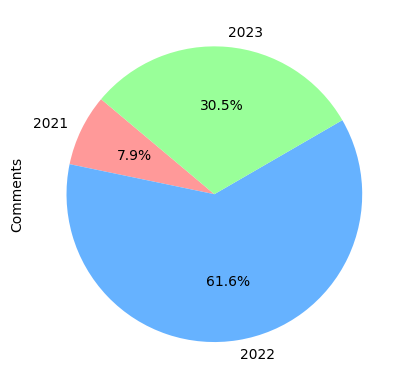

In [55]:
# Assuming sizes and labels are your data
sizes = y_com.values
labels = y_com.index

# Choose a pastel color palette
pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Plot the pie chart with the chosen color palette
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=pastel_colors)
plt.ylabel("Comments")

plt.show()

In [56]:

max_reaction_row = post_df_full.loc[post_df_full["comments"].idxmax()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_comments = max_reaction_row["comments"]

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Comments: {reaction_comments}")

Post Id: 2708273079303120
Post Text: Gh√©t c·ªßa n√†o tr·ªùi trao c·ªßa ƒë·∫•y
Time: 2022-09-06 18:30:30
Comments: 8125


In [57]:

max_reaction_row = post_df_full.loc[post_df_full["comments"].idxmin()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_comments = max_reaction_row["comments"]

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Comments: {reaction_comments}")

Post Id: 2575499035913859
Post Text: Xuka ki·ªÉu: Keep My Name Out Your F***king Head
Time: 2022-03-30 15:41:39
Comments: 1


##### Number of articles with comments greater than 1000

In [48]:
post_df_full[post_df_full["comments"] >= 1000][["post_id", "post_text", "time", "reactions", "reaction_count", "shares", "comments"]]

post_id                                          post_text  \
0     733451988821373  Phim ho·∫°t h√¨nh ƒê√¥ r√™ mon t·ª´ng ƒë∆∞·ª£c l·ªìng ti·∫øng ...   
14    714647757368463                C√≥ h·∫≥n ph√≤ng ri√™ng cho chu·ªôt c∆° :))   
41   2807155129414914       ƒê·ªôc l√† V≈©ng T√†u :)))\n\n·∫¢nh: Giang Ho√†ng ƒêan   
45   2786271731503254  Nu√¥i ƒÉn mi·ªÖn ph√≠ r·ªìi ƒë·ªÉ n√≥ t√¨m m·∫π trong th√πng ...   
64   2708273079303120                     Gh√©t c·ªßa n√†o tr·ªùi trao c·ªßa ƒë·∫•y   
123  2461153630681734                 L√† ma nh∆∞ng xem phim ma v·∫´n s·ª£ :))   

                   time                                          reactions  \
0   2023-11-11 08:50:06  {'th√≠ch': 10524, 'y√™u th√≠ch': 607, 'haha': 150...   
14  2023-10-11 20:59:04  {'th√≠ch': 43874, 'y√™u th√≠ch': 7652, 'haha': 26...   
41  2022-12-19 15:05:34  {'th√≠ch': 3036, 'y√™u th√≠ch': 721, 'haha': 1820...   
45  2022-11-27 17:04:17  {'th√≠ch': 18542, 'y√™u th√≠ch': 228, 'haha': 341...   
64  2022-09-06 18:30:30  {'th√≠ch': 47712, 'y√™u th√≠ch': 1907, 'haha': 57...   
123 2021-11-12 21:48:30  {'th√≠ch': 25386, 'y√™u th√≠ch': 332, 'haha': 471...   

     reaction_count  shares  comments  
0             27027    2397      3933  
14            78610     916      2014  
41             5700     128      1153  
45            54060     331      1510  
64           110184     921      8125  
123           74790     436      1304

### Articles posted by day of the week

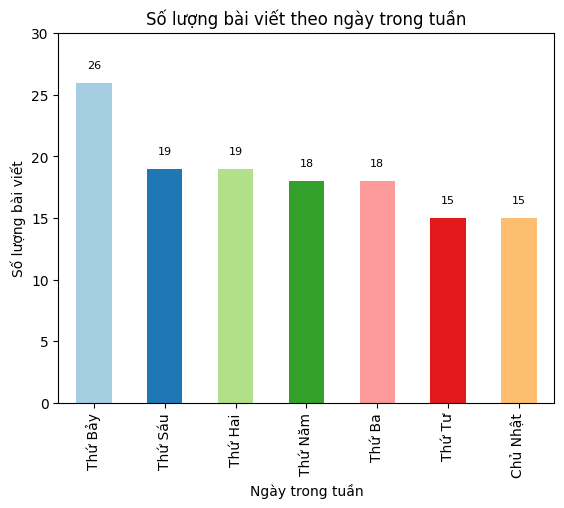

In [43]:
day_name_mapping = {
    'Monday': 'Th·ª© Hai',
    'Tuesday': 'Th·ª© Ba',
    'Wednesday': 'Th·ª© T∆∞',
    'Thursday': 'Th·ª© NƒÉm',
    'Friday': 'Th·ª© S√°u',
    'Saturday': 'Th·ª© B·∫£y',
    'Sunday': 'Ch·ªß Nh·∫≠t'
}

post_df_full['week_day'] = post_df_full['time'].apply(lambda x: day_name_mapping[x.strftime('%A')])

day_counts = post_df_full['week_day'].value_counts()

colors = cm.Paired(np.arange(len(day_counts)))
ax = day_counts.plot(kind='bar', color=colors)

for i, v in enumerate(day_counts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=8)

plt.ylim(0, 30)

plt.title('S·ªë l∆∞·ª£ng b√†i vi·∫øt theo ng√†y trong tu·∫ßn')
plt.xlabel('Ng√†y trong tu·∫ßn')
plt.ylabel('S·ªë l∆∞·ª£ng b√†i vi·∫øt')
plt.show()

### Regular posting timestamps

In [50]:
post_df_full['post_hour'] = post_df_full['time'].dt.hour
x_h = post_df_full.groupby('post_hour').size()
x_h

post_hour
4      1
5      1
6      1
7      2
8      2
9      1
10     9
11     2
12     3
13    10
14     6
15    14
16    10
17     9
18    11
19    18
20    17
21    11
22     2
dtype: int64

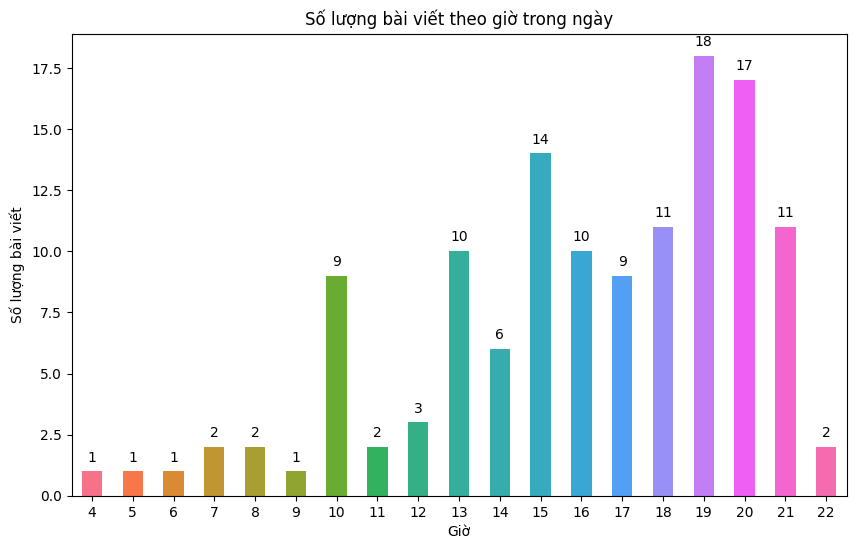

In [51]:
plt.figure(figsize=(10, 6))
bright_palette = sns.color_palette("husl", n_colors=len(x_h))

ax = x_h.plot(kind='bar',color = bright_palette)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('S·ªë l∆∞·ª£ng b√†i vi·∫øt theo gi·ªù trong ng√†y')
plt.xlabel('Gi·ªù')
plt.ylabel('S·ªë l∆∞·ª£ng b√†i vi·∫øt')
plt.xticks(rotation=0) 

plt.show()

##### Time frame with the most abd fewest posts

In [52]:
max_hour = x_h.idxmax()
max_post_count = x_h.max()

print(f"Th·ªùi gian c√≥ nhi·ªÅu b√†i post nh·∫•t v√†o kho·∫£ng:{max_hour} gi·ªù,s·ªë l∆∞·ª£ng: {max_post_count} b√†i post")


Th·ªùi gian c√≥ nhi·ªÅu b√†i post nh·∫•t v√†o kho·∫£ng:19 gi·ªù,s·ªë l∆∞·ª£ng: 18 b√†i post


In [53]:
min_hour = x_h.idxmin()
min_post_count = x_h.min()

print(f"Th·ªùi gian c√≥ √≠t b√†i post nh·∫•t v√†o kho·∫£ng: {min_hour} gi·ªù,s·ªë l∆∞·ª£ng: {min_post_count} b√†i post")


Th·ªùi gian c√≥ √≠t b√†i post nh·∫•t v√†o kho·∫£ng: 4 gi·ªù,s·ªë l∆∞·ª£ng: 1 b√†i post


### Average number of interactions per hour

In [54]:
x_r = post_df_full.groupby("post_hour")["reaction_count"].sum()
x_r

post_hour
4       3882
5       5218
6       2325
7       7089
8      38107
9      11540
10     16383
11     13382
12     10224
13     24958
14     43860
15     49783
16     22783
17    153407
18    160977
19     68402
20    132430
21    110115
22      3219
Name: reaction_count, dtype: int64

In [55]:
#How many interactions does a post get on average?
x_a = x_r // x_h
x_a

post_hour
4      3882
5      5218
6      2325
7      3544
8     19053
9     11540
10     1820
11     6691
12     3408
13     2495
14     7310
15     3555
16     2278
17    17045
18    14634
19     3800
20     7790
21    10010
22     1609
dtype: int64

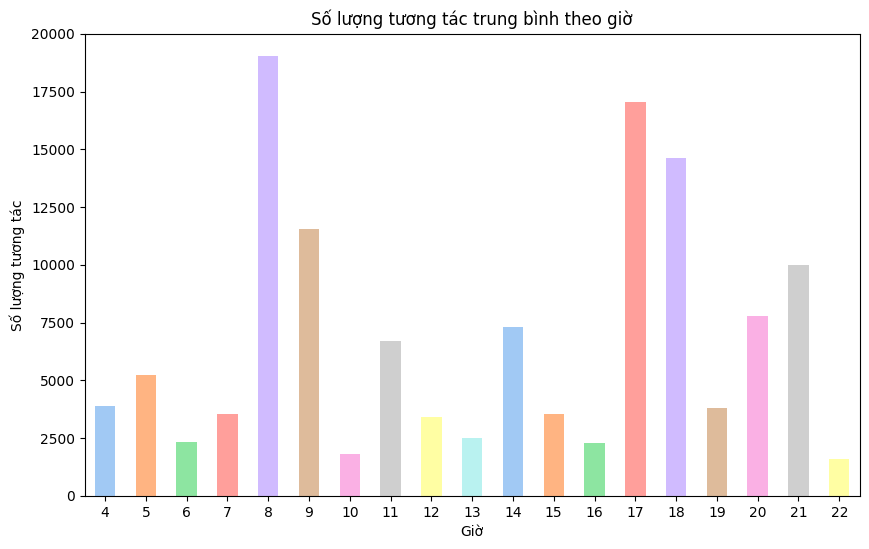

In [56]:

plt.figure(figsize=(10, 6))
pastel_palette = sns.color_palette("pastel", n_colors=len(x_a))

x_a.plot(kind='bar',color = pastel_palette)
plt.title('S·ªë l∆∞·ª£ng t∆∞∆°ng t√°c trung b√¨nh theo gi·ªù')
plt.xlabel('Gi·ªù')
plt.ylabel('S·ªë l∆∞·ª£ng t∆∞∆°ng t√°c')
plt.xticks(rotation=0) 

plt.show()

In [57]:
max_hour = x_a.idxmax()
max_post_count = x_a.max()

print(f"L∆∞·ª£t t∆∞∆°ng t√°c trung b√¨nh c·ªßa b√†i vi·∫øt cao nh·∫•t v√†o l√∫c:{max_hour} gi·ªù,s·ªë l∆∞·ª£ng: {max_post_count} t∆∞∆°ng t√°c tr√™n 1 b√†i post")

L∆∞·ª£t t∆∞∆°ng t√°c trung b√¨nh c·ªßa b√†i vi·∫øt cao nh·∫•t v√†o l√∫c:8 gi·ªù,s·ªë l∆∞·ª£ng: 19053 t∆∞∆°ng t√°c tr√™n 1 b√†i post


In [58]:
max_hour = x_a.idxmin()
max_post_count = x_a.min()

print(f"L∆∞·ª£t t∆∞∆°ng t√°c trung b√¨nh c·ªßa b√†i vi·∫øt th·∫•p nh·∫•t v√†o l√∫c:{max_hour} gi·ªù,s·ªë l∆∞·ª£ng: {max_post_count} t∆∞∆°ng t√°c tr√™n 1 b√†i post")

L∆∞·ª£t t∆∞∆°ng t√°c trung b√¨nh c·ªßa b√†i vi·∫øt th·∫•p nh·∫•t v√†o l√∫c:22 gi·ªù,s·ªë l∆∞·ª£ng: 1609 t∆∞∆°ng t√°c tr√™n 1 b√†i post


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Analyze keywords in the article

### Number of articles containing the keyword "Doraemon"

In [72]:
a = post_df_full_with_reactions['post_text'].tolist()
print("T·ªïng s·ªë b√†i vi·∫øt:", len(a))

res = []
for i in a:
    if isinstance(i, str) and "Doraemon" in i:
        res.append(i)

print(len(res), "b√†i vi·∫øt ch·ª©a t·ª´ kh√≥a 'Doraemon'")


T·ªïng s·ªë b√†i vi·∫øt: 130
19 b√†i vi·∫øt ch·ª©a t·ª´ kh√≥a 'Doraemon'


### Number of articles containing the keyword "Nobita"

In [73]:
a = post_df_full_with_reactions['post_text'].tolist()
print("T·ªïng s·ªë b√†i vi·∫øt:", len(a))

res = []
for i in a:
    if isinstance(i, str) and "Nobita" in i:
        res.append(i)

print(len(res), "b√†i vi·∫øt ch·ª©a t·ª´ kh√≥a 'Nobita'")

T·ªïng s·ªë b√†i vi·∫øt: 130
10 b√†i vi·∫øt ch·ª©a t·ª´ kh√≥a 'Nobita'


### Wordcloud 

In [74]:
df_text = post_df_full[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

post_id                                          post_text
0     733451988821373  Phim ho·∫°t h√¨nh ƒê√¥ r√™ mon t·ª´ng ƒë∆∞·ª£c l·ªìng ti·∫øng ...
1     733109305522308  |B·ªò BOARD GAME DORAEMON ƒê·∫¶U TI√äN S·∫ÆP XU·∫§T HI·ªÜN...
2     732388768927695  Ch∆∞a l√†m ƒë∆∞·ª£c t√≠ch s·ª± g√¨ nh∆∞ng v·ª´a ƒë·∫øn ƒë√£ ƒÉn l...
3     731920548974517                          M·ªôt ph√∫t th·∫≠t l√≤ng n√†o :)
4     731844392315466  Movie Doraemon m·ªõi: Nobita v√† cu·ªôc phi√™u l∆∞u ƒë...
..                ...                                                ...
125  2455989184531512           L·∫°i t·ªôi nghi·ªáp qu√° c∆°\nCre: Chuy·ªán nh√† S
126  2452635751533522                                            Xinhhhh
127  2448957895234641  Nghe n√≥i l√† ch∆°i th√¢n v·ªõi nhau s·∫Ω tr·ªü n√™n gi·ªën...
128  2439249156205515  ·ªû nh√† ngh·ªâ d·ªãch c·ª© nh∆∞ th·∫ø n√†y\nB·∫£o sao tr·ªçng ...
129  2437721029691661  H√¨nh ·∫£nh t√¥i ch√©p h·∫øt b√†i online trong t∆∞∆°ng l...

[130 rows x 2 columns]

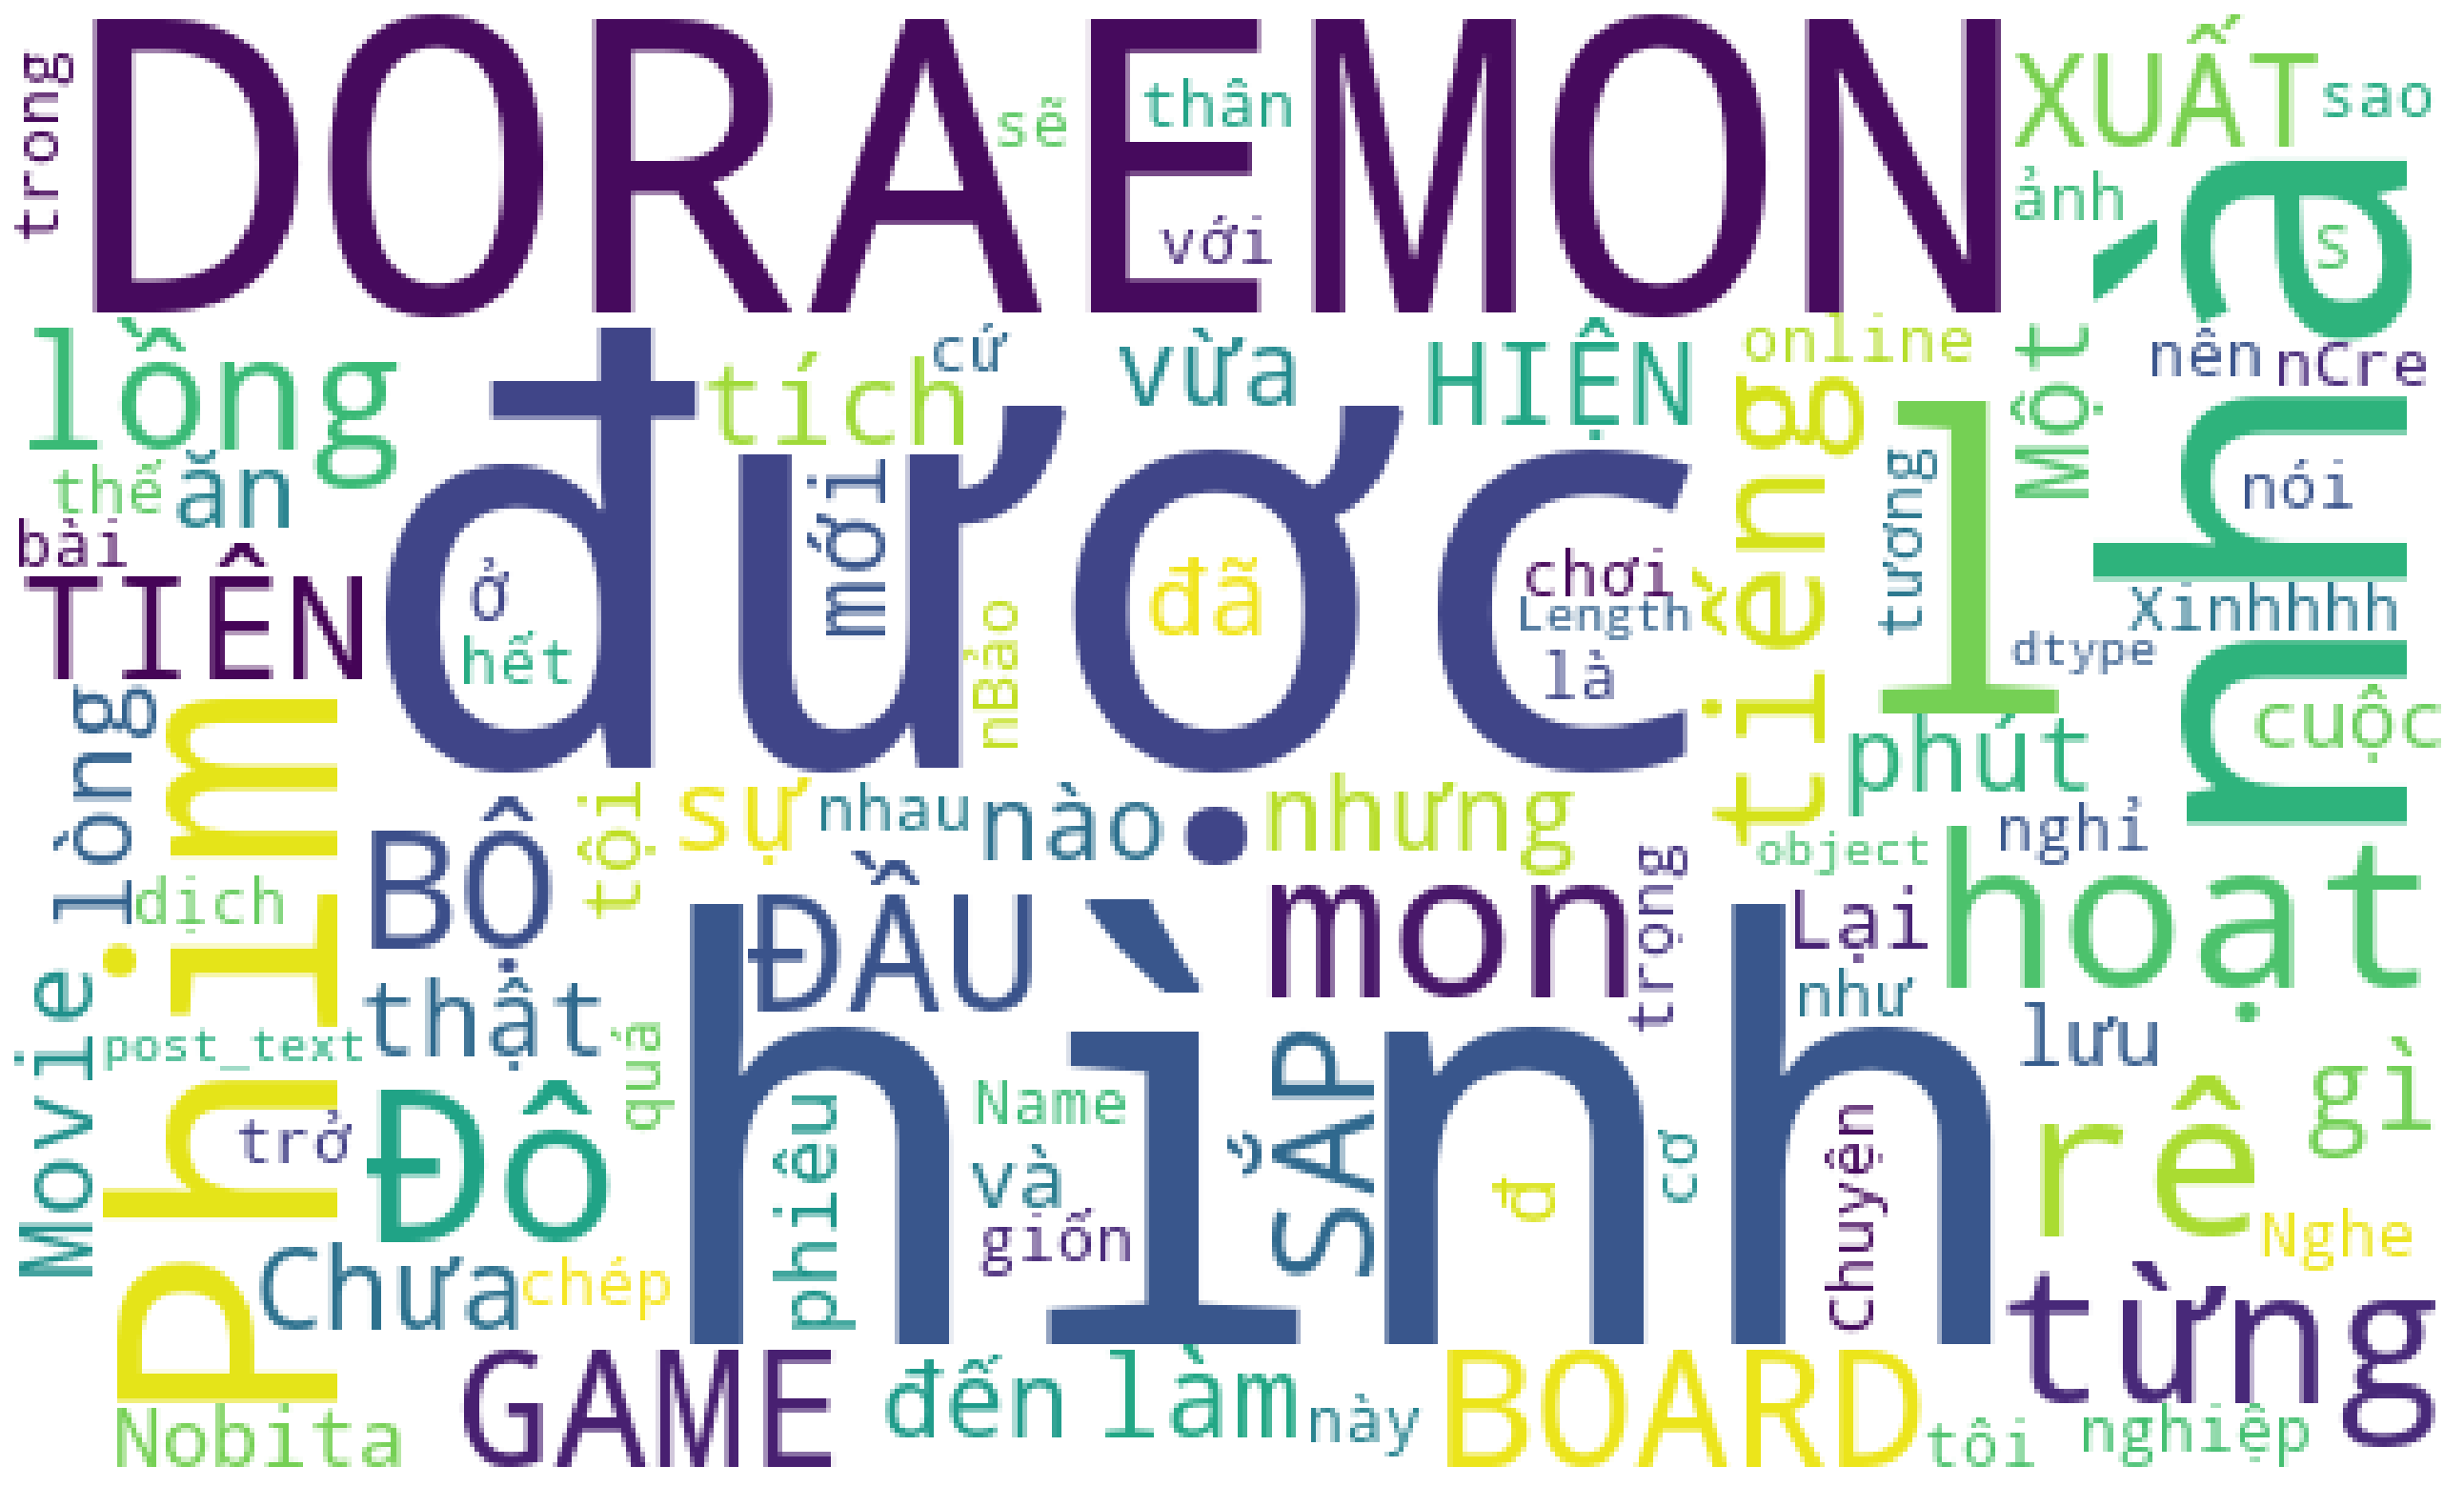

In [75]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Keyword

In [76]:
!pip install -U nltk
!pip install rake-nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk import tokenize
import math
from operator import itemgetter

#### Read file and hendle

In [78]:
post_df_full_with_reactions['post_text'] = post_df_full_with_reactions['post_text'].fillna("")  
text = ""
for i in post_df_full_with_reactions['post_text']:
    if isinstance(i, str):
        text = text + i + "\n"

In [79]:
text

'Phim ho·∫°t h√¨nh ƒê√¥ r√™ mon t·ª´ng ƒë∆∞·ª£c l·ªìng ti·∫øng B·∫Øc v√† chi·∫øu tr√™n VTV1 üòÖ\n|B·ªò BOARD GAME DORAEMON ƒê·∫¶U TI√äN S·∫ÆP XU·∫§T HI·ªÜN!!|\n\nM·ªõi nghe n√≥i EverJoy s·∫Øp tr√¨nh l√†ng b·ªô game Doraemon ƒë∆∞·ª£c ch√≠nh ch·ªß b·∫£n quy·ªÅn Fujio b√™n Nh·∫≠t c·∫•p ph√©p, ch·∫Øc ch·∫Øn s·∫Ω t·∫°o ra m·ªôt c∆°n s·ªët l·ªõn.\nC√≥ th·ªÉ ch√∫ng ta ƒë√£ t·ª´ng nghe qua ƒë·∫øn c√°i t√™n EverJoy. EverJoy Publishing l√† c√¥ng ty ho·∫°t ƒë·ªông trong lƒ©nh v·ª±c gi·∫£i tr√≠ t∆∞∆°ng t√°c, ƒë·∫ßu t∆∞ v√†o c√°c th∆∞∆°ng hi·ªáu h√†ng ƒë·∫ßu v·ªÅ gi·∫£i tr√≠ nh∆∞ Board Game VN (th∆∞∆°ng hi·ªáu ph√°t h√†nh v√† ph√¢n ph·ªëi board game l·ªõn nh·∫•t Vi·ªát Nam), hay L·ªõp H·ªçc M·∫≠t Ng·ªØ (th∆∞∆°ng hi·ªáu truy·ªán tranh d√†nh cho tu·ªïi teen s·ªë 1 t·∫°i Vi·ªát Nam). C√°c s·∫£n ph·∫©m v√† gi·∫£i ph√°p c·ªßa EverJoy ƒë√£ mang ni·ªÅm vui ƒë·∫øn h√†ng tri·ªáu kh√°ch h√†ng, ƒë√°p ·ª©ng nhu c·∫ßu gi·∫£i tr√≠ t·∫°i gia ƒë√¨nh c≈©ng nh∆∞ t·∫°i c√¥ng s·ªü.\nTrong nƒÉm 2023, ngo√†i vi·ªác ph√

In [80]:
fi = open("stop_word.inp",encoding="utf-8")
s = fi.read()
s = s.replace("'","")
s = s.split()

In [81]:
for i in s:
  text = text.replace(i,"")

In [82]:
# t√¨m s·ªë t·ª´ xu·∫•t hi·ªán trong t√†i li·ªáu
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)

#t√¨m s·ªë c√¢u xu·∫•t hi·ªán trong t√†i li·ªáu
total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len) 

1694
57


In [83]:
fi = open("stop_word2.inp",encoding="utf-8")
ss = fi.read()
ss = ss.replace("'","")
ss = ss.split()
print(ss)

['nh∆∞ng,', 'tr·∫£,', 'nh√≥m,', 'v·∫≠y,', 'li√™n_k·∫øt,', 'th·∫©y,', 'c·∫•p,', 'v·ª´a,', '∆°,', 'tr∆∞·ªõc,', 'm·ªçi,', 'nh·∫≠n,', 'l·ªùi,', 'v√†,', 'amen,', 'ch·∫≠c,', 'c√°ch,', 'tr√™n,', 'b√†i,', 'ng√¥i,', 'tr·ªát,', 'n√≥i,', 'hai,', 'bu·ªïi,', 'th·∫•p,', 'lo√†i,', 't·∫°o,', 'th·ªëc,', 'v·ª•t,', 'kh√¥ng,', 'th∆∞·ªùng,', 'ch√≠nh,', 'c√πng,', 'ƒëi·ªÉm,', 'b·ªát,', 'n·∫øu,', '√°i,', 'o√°i,', 'b·∫£n,', 'gi·∫£m,', 'b·ªÉn,', 'gi·ªØa,', 'b√¥ng,', 's·∫Øp,', 'gi·ªù,', 'ngay,', 'c√°i,', 'kh√≥,', 'th·∫ø,', 'b·ªóng,', 'tr√°nh,', 'r√µ,', 'thu·∫ßn,', 'ph√≠a,', 'b√™n,', 'hoa,', 'ch√∫,', 't·ªõi,', 'b∆∞·ªõc,', 'b√†,', 'ch·ªâ,', '·ªù,', 'chung,', 'nghƒ©,', 't·ªânh,', 'tin,', 'r·∫±ng,', 'ng√†y,', 'cƒÉn,', 'g·∫ßn,', 'ngo·∫£i,', 's√°ng,', 'n√≥c,', 'm·ªëi,', 'ƒë∆∞·ª£c,', 'c√†ng,', 'r·ªìi,', 'ch·ªã,', 'cu·ªôc,', 'n·∫∑ng,', 'con,', 'sang,', 'b·ª©c,', 'ngu·ªìn,', 'gi·ªØ,', 'lo·∫°i,', 'ƒëi·ªÅu,', 'nh·∫•t,', 'ph√≥t,', 'b·ªõ,', 'tho·∫Øt,', 'ngo√†i,', 'c·∫ßn,', 't·ª´ng,', 'l√∫c,', 'b·∫±ng,', 'v·∫´n,', 'c∆°,', 'n√

In [84]:
# T√≠nh TF cho m·ªói t·ª´
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in ss:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
print(tf_score)

# Dividing by total_word_length for each dictionary element
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

print(tf_score)

{'Phim': 2, 'hot': 5, 'ƒê': 4, 'r√™': 4, 'mon': 3, 'ng': 36, 'lng': 2, 'ti·∫øng': 5, 'B·∫Øc': 3, 'v': 32, 'chi·∫øu': 1, 'VTV1': 1, 'üòÖ': 1, '|B·ªò': 1, 'BOARD': 1, 'GAME': 1, 'DORAEMON': 1, 'ƒê·∫¶U': 1, 'TI√äN': 1, 'S·∫ÆP': 1, 'XU·∫§T': 1, 'HI·ªÜN!!|': 1, 'Mi': 2, 'EverJoy': 6, 'tr√¨nh': 2, 'gme': 7, 'Doon': 17, 'ch·ªß': 2, '·ªÅn': 1, 'Fujio': 4, 'Nh·∫≠t': 4, 'ph√©p,': 1, 'ch·∫Øn': 2, 'cn': 5, 't': 15, '': 17, 'C√≥': 3, 'c': 42, 'Publishing': 1, 'ty': 1, 'ƒë·ªông': 3, 'lƒ©nh': 1, 'v·ª±c': 1, 'gi·∫£i': 4, 'tr√≠': 3, 't∆∞ng': 4, 'tc,': 2, 'ƒë': 15, 't∆∞': 2, 'th∆∞ng': 4, 'hi·ªáu': 4, 'hng': 2, 'Bord': 2, 'Gme': 2, 'VN': 2, '(th∆∞ng': 2, 'pht': 9, 'hnh': 6, 'ph√¢n': 1, 'ph': 3, 'bord': 6, 'Vi·ªát': 8, 'Nm),': 1, 'Lp': 1, 'H·ªçc': 1, 'M·∫≠t': 1, 'Ng·ªØ': 1, 'truy·ªán': 6, 'tnh': 4, 'teen': 1, '1': 4, 'Nm)': 1, 'Cc': 1, 's·∫£n': 2, 'ph·∫©m': 3, 'php': 1, 'ni·ªÅm': 1, 'vui': 2, 'tri·ªáu': 1, 'h': 10, 'hng,': 1, 'ƒëp': 1, 'nhu': 4, 'gi': 4, 'ƒë√¨nh': 3, 's': 7, 'Trong': 3, '2023,': 1, 'ngoi

In [85]:
def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))


#  T√≠nh IDF cho m·ªói t·ª´
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in s:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

print(idf_score)

# t√≠nh k·∫øt qu·∫£ l√† t√≠ch TF*IDF
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()} 
print(tf_idf_score)

{'Phim': 1.7404661748405046, 'hot': 0.3053816495511819, 'ƒê': 1.4039939382192914, 'r√™': 1.209837923778334, 'mon': 0.3794896217049037, 'ng': 0.17185025692665923, 'lng': 0.9075570519054004, 'ti·∫øng': 0.8649974374866045, 'B·∫Øc': 1.8458266904983307, 'v': 0.5465437063680699, 'chi·∫øu': 4.04305126783455, 'VTV1': 4.04305126783455, 'üòÖ': 4.04305126783455, '|B·ªò': 4.04305126783455, 'BOARD': 4.04305126783455, 'GAME': 4.04305126783455, 'DORAEMON': 4.04305126783455, 'ƒê·∫¶U': 4.04305126783455, 'TI√äN': 4.04305126783455, 'S·∫ÆP': 4.04305126783455, 'XU·∫§T': 4.04305126783455, 'HI·ªÜN!!|': 4.04305126783455, 'Mi': 1.0473189942805592, 'EverJoy': 2.097141118779237, 'tr√¨nh': 1.6451559950361796, 'gme': 0.9985288301111273, 'Doon': 0.8649974374866045, 'ch·ªß': 2.6567569067146595, '·ªÅn': 4.04305126783455, 'Fujio': 2.097141118779237, 'Nh·∫≠t': 1.33500106673234, 'ph√©p,': 4.04305126783455, 'ch·∫Øn': 1.55814461804655, 'cn': 0.25886163391628897, 't': 0.09180754925312289, '': 0.0, 'C√≥': 1.645155995036179

In [86]:
# L·∫•y N t·ª´ quan trong nh·∫•t
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

from operator import itemgetter
get_top_n(tf_idf_score, 10)

{':))': 0.026221494608014668,
 '#on': 0.010432401142498483,
 'v': 0.010324320309196125,
 '·∫¢nh:': 0.009546756240459387,
 'üòå': 0.009410000850229019,
 '<3': 0.009410000850229019,
 'm√®o': 0.00927324545999865,
 'Vi·ªát': 0.008717009164100734,
 'Doon': 0.008680611828377968,
 'Cre:': 0.008278218159633383}